<a href="https://colab.research.google.com/github/darshxm/dataset-suicides/blob/master/Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we find correlation between various factors and heart disease and find the risk of heart disease in an individual using the machine learning tool 'Keras'. 

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from math import pi
import pandas as pd
url = 'https://raw.githubusercontent.com/darshxm/dataset-suicides/master/heart.csv'
df = pd.read_csv(url)
df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


dataset source - http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

1) age - age in years 

2) sex - (1 = male; 0 = female) 

3) cp - chest pain type 

4) trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

5) chol - serum cholestoral in mg/dl 

6) fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

7) restecg - resting electrocardiographic results 

8) thalach - maximum heart rate achieved 

9) exang - exercise induced angina (1 = yes; 0 = no) 

10) oldpeak - ST depression induced by exercise relative to rest 

11) slope - the slope of the peak exercise ST segment 

12) ca - number of major vessels (0-3) colored by flourosopy 

13) thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 

14) target - have disease or not (1=yes, 0=no)



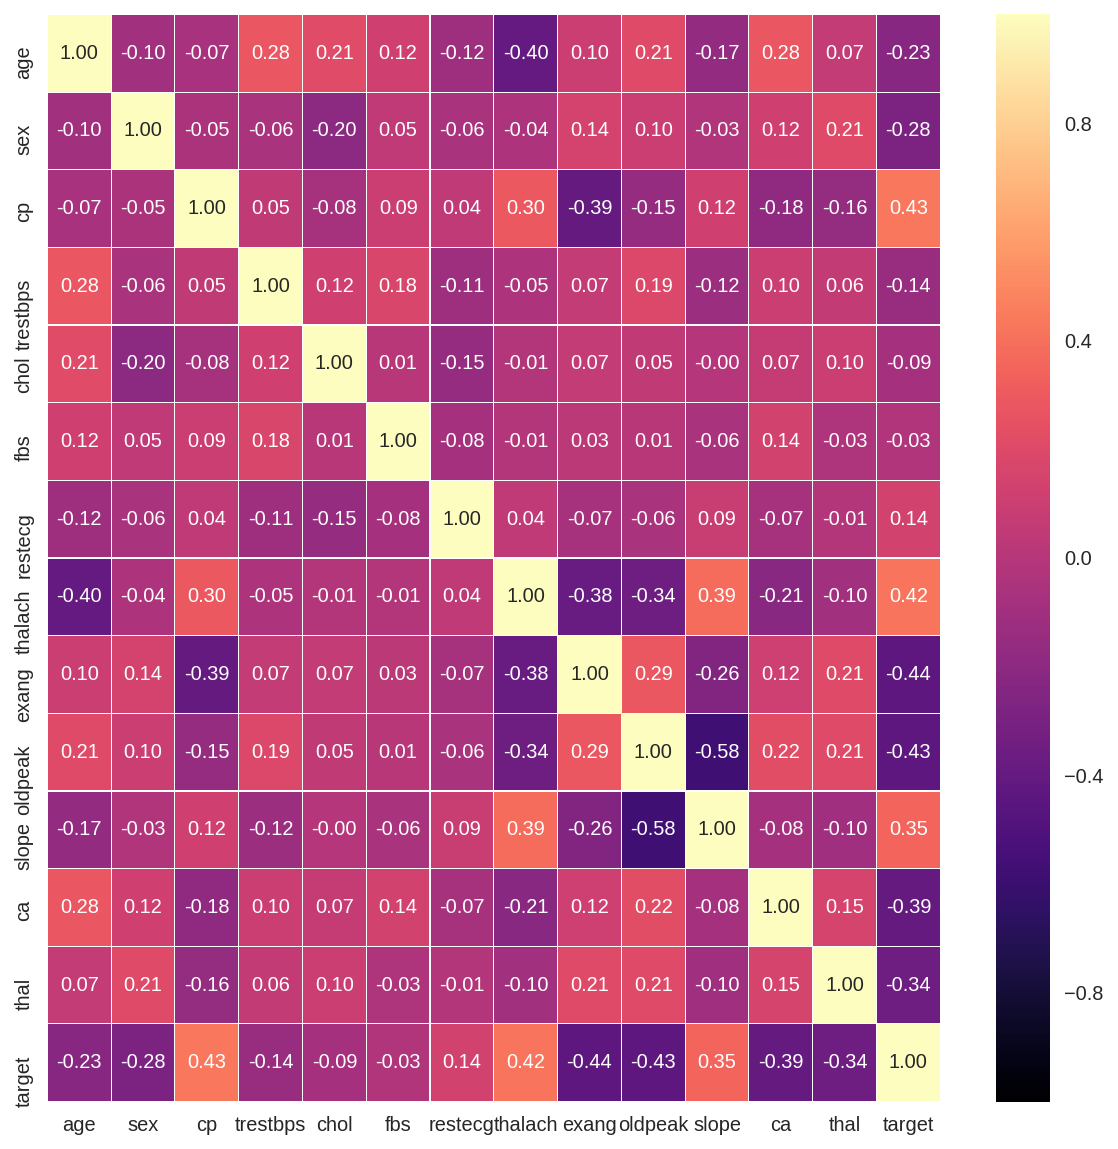

In [0]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [0]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

to_be_dropped = ['cp', 'thal', 'slope']
df = df.drop(to_be_dropped, axis=1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [0]:
df = (df - np.min(df)) / (np.max(df) - np.min(df)).values

In [0]:
features = df.drop("target", axis=1)
targets = df.target.values

In [0]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_targets,test_targets = train_test_split(features,targets,test_size = 0.20,random_state = 42)

In [0]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_features, train_targets, validation_split=0.2, epochs=100, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 193 samples, validate on 49 samples
Epoch 1/100
193/193 [==============================] - 0s 2ms/step - loss: 0.2310 - mean_squared_error: 0.2310 - mean_absolute_error: 0.4792 - val_loss: 0.1985 - val_mean_squared_error: 0.1985 - val_mean_absolute_error: 0.4402
Epoch 2/100
193/193 [==============================] - 0s 136us/step - loss: 0.1866 - mean_squared_error: 0.1866 - mean_absolute_error: 0.4187 - val_loss: 0.1592 - val_mean_squared_error: 0.1592 - val_mean_absolute_error: 0.3753
Epoch 3/100
193/193 [==============================] - 0s 130us/step - loss: 0.1511 - mean_squared_error: 0.1511 - mean_absolute_error: 0.3580 - val_loss: 0.1290 - val_mean_squared_error: 0.1290 - val_mean_absolute_error: 0.3164
Epoch 4/100
193/193 [==============================] - 0s 133us/step - loss: 0.1324 - mean_squared_error: 0.1324 - mean_absolute_error: 0.3092 - val_loss: 0.1194 - val_mean_squared_error: 0.1194 - val_mean_absolute_error: 

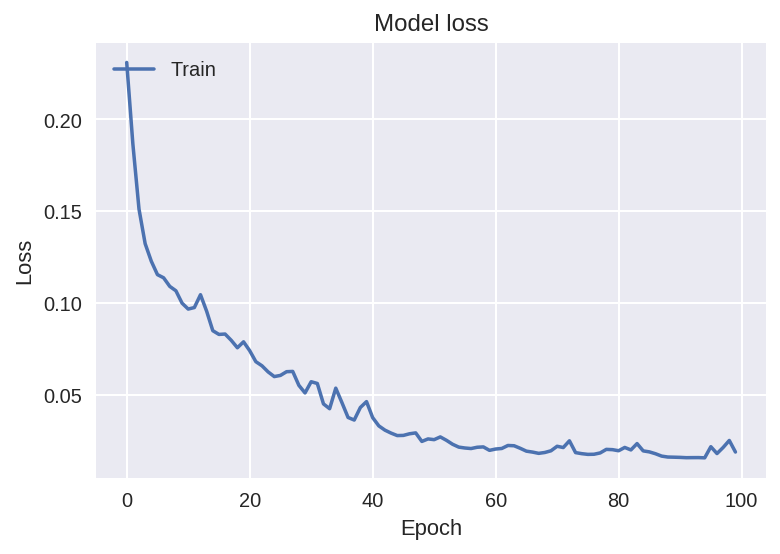

In [0]:
#print(vars(history))
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

This shows the loss at 0.01

There is high correlation between chest pain and heart disease, and using that the model predicts the chance of heart disease in the future with reasonable accuracy.

Text(0.5, 1.0, 'Prediction')

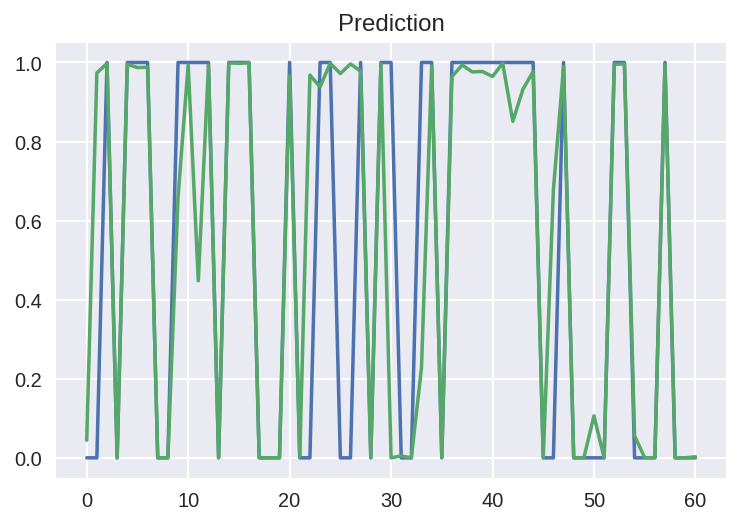

In [0]:
y_pred = model.predict(test_features)
plt.plot(test_targets)
plt.plot(y_pred)
plt.title('Prediction')